# Matplotlib

Matplotlib es un paquete de visualización en Python. Fue creado
entorno a 2002, originalmente con la idea de tener un método de 
insertar gráficas de gnuplot en IPython con un interfaz basado en
Matlab. Finalmente acabó desarrollándose como un paquete gráfico
independiente, que todavía conserva parte del interfaz estilo matlab.

Uno de los fuertes de matplotlib es que es multiplataforma y que además
permite cambiar el interfaz gráfico de salida fácilmente, de ficheros
de imagen a consolas gráficas de QT, Tk u otra biblioteca de 
componentes gráficos.

El interfaz de matplotlib es muy extenso y permite muchísimos
estilos gráficos. Por otro lado, una queja común de matplotlib
es que los gráficos por defecto eran *feos*. En las versiones 2 y 3 
(la actual en 2021) se procedió a mejorar los valores por defecto
y ahora el aspecto es bastante mejor. Además se desarrolló
más el interfaz para facilitar la aplicación de **estilos**.

Entre los paquetes gráficos disponibles, hay una buena cantidad
que derivan de o se basan en matplotlib, como seaborn o también
la extensión gráfica de pandas. Veremos también un ejemplo
de otro paquete con una filosofía diferente, plotly.

## Manejando matplotlib
Estos son los alias habituales de matplotlib.
Es habitual utilizar funciones de estos dos módulos

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Matplotlib proporciona dos interfaces para generar gráficas.

El primero es un sistema orientado a objetos, con una estructura
en la cada figura contiene un conjunto de ejes y en cada eje
podemos incluir objetos gráficos. En este sistema los componentes
gráficos se manejan de manera explícita.

El sistema está basado en funciones, estilo matlab, y está
pensado para el trabajo interactivo. Estas funciones están en 
el módulo `plt`. Cuando trabajamos con este interfaz, matplotlib
almacena internamente los elementos gráficos que utilizamos
y aplica las funciones sobre los últimos que hemos generado.

In [2]:
import numpy as np
x = np.linspace(-5, 5, 1000)

Gráfica con el estilo OO. La figura y cada grupo
de ejes son objetos y operamos sobre ellos.

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>


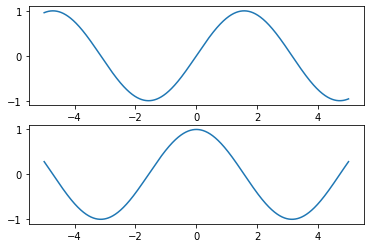

In [3]:
fig, axs = plt.subplots(2)
print(type(fig))
print(type(axs))
axs[0].plot(x, np.sin(x))
axs[1].plot(x, np.cos(x))

La misma gráfica con el estilo matlab. La figura y cada grupo
de ejes existen pero de manera implícita. `plt`
lleva la cuenta de en qué objeto `Axis` estamos pintando
y diferentes funciones van cambiando entre ellas.

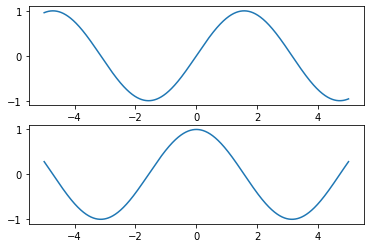

In [4]:
plt.subplot(2, 1, 1) # (fila, columna, eje gráfico 1)
plt.plot(x, np.sin(x))
# segundo panel
plt.subplot(2, 1, 2) # (fila, columna, eje gráfico 2)
plt.plot(x, np.cos(x));

Si estamos utilizando este segundo interfaz, siempre podemos
acceder a los ejes o a la figura usando las funciones `gca()`
o `gcf()`

eje es  AxesSubplot(0.125,0.536818;0.775x0.343182)


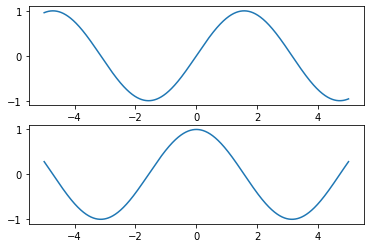

In [5]:
plt.subplot(2, 1, 1) # (fila, columna, eje gráfico 1)
plt.plot(x, np.sin(x))
ax = plt.gca()
print('eje es ', ax)
# segundo panel
plt.subplot(2, 1, 2) # (fila, columna, eje gráfico 2)
plt.plot(x, np.cos(x));

El estilo que usemos es cuestión de gustos. Normalmente es más
práctico utilizar el estilo OO cuando estamos realizando un
programa o un paquete y también cuando la figura es compleja.
Cuando trabajamos interactivamente puede ser más eficiente
el estilo matlab.

## Cómo mostrar los gráficos

Si tecleamos los ejemplos de código anteriores en una consola de python
o ipython, no obtendremos ninguna gráfica. El comportamiento
de un cuaderno y los interfaces es de consola es diferente.

En principio, para indicar que una gráfica está terminada y está
lista para mostrarse hay que utilizar la función `plt.show()`. Esta
función interactúa con el **backend** gráfico y le indica que el dibujo
puede realizarse.

Si en lugar de estar trabajando con la consola de python o en un
programa, estamos en ipython, podemos hacerlo algo más fácil
utilizando un comando mágico: `%matplotlib`

Si cargamos este comando **antes** de importar `matplotlib.pyplot`,
las gráficas se muestran según las vamos haciendo, sin necesidad de utilizar
`plt.show()`. Reutilizamos la ventana gráfica abierta (que puede borrarse con
`plt.clf()` o `plt.cla()`. Algunos cambios (por ejemplo, cambiar el grosor de
las líneas) requiren redibujar con `plt.draw()`
 
Por último, trabajando en jupyter, el modo por defecto es `%matplotlib inline`
en el que las gráficas se muestran dentro del cuaderno tras cada celda.

Existe también otro modo en desarrollo `%matplotlib notebook`, que permite 
cierta interacción con las gráficas.

## Ficheros gráficos

Matplotlib permite guardar las figuras en una gran cantidad de formatos.
La función que lo hace es `plt.savefig()` o bien el método `.savefig()`
de un objeto figura que exista.

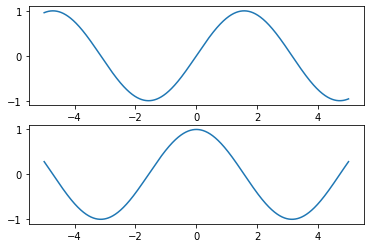

In [6]:
fig, axs = plt.subplots(2)
axs[0].plot(x, np.sin(x))
axs[1].plot(x, np.cos(x))
fig.savefig('fig1.png')

El formato de salida se infiere de la extensión del fichero que utilicemos.
Podemos ver una lista de opciones disponibles con:

In [7]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}